In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv('/content/Employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [33]:
data.shape

(4653, 9)

In [34]:
data.duplicated().sum()

1889

In [35]:
data.drop_duplicates(inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


In [37]:
data.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [38]:
numerical_data = data.select_dtypes(include=['int', 'float']).drop(columns='LeaveOrNot')
categorical_data = data.select_dtypes(exclude=['int', 'float'])

In [39]:
numerical_data.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
0,2017,3,34,0
1,2013,1,28,3
2,2014,3,38,2
3,2016,3,27,5
4,2017,3,24,2


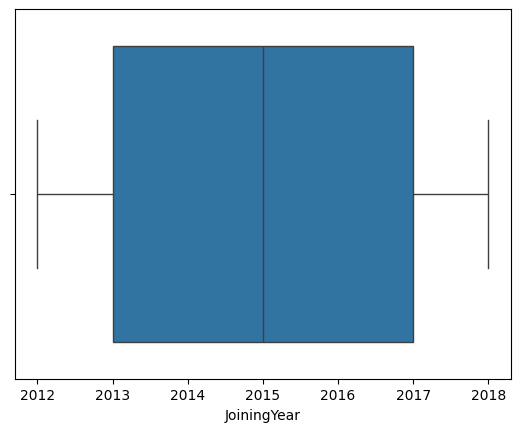

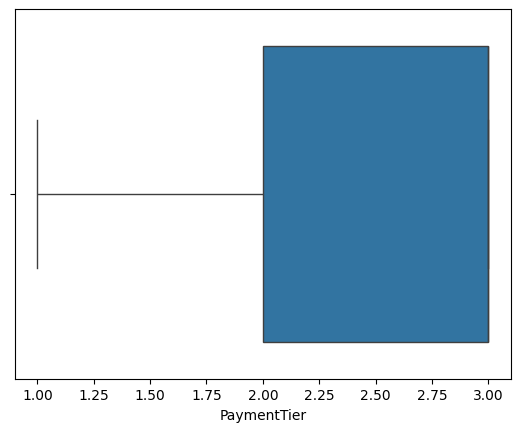

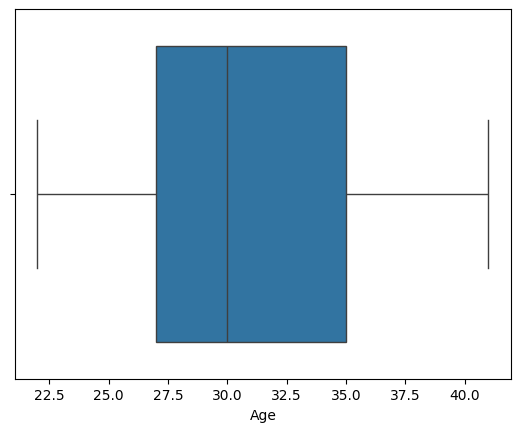

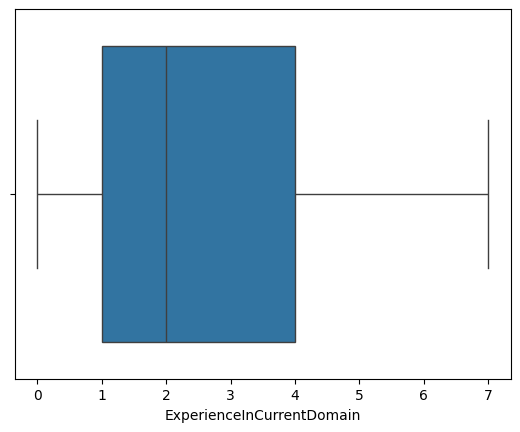

In [40]:
for col in numerical_data.columns:
  sns.boxplot(x = col, data = data)
  plt.show()

In [41]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,2764.0,2015.090449,1.885943,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,2764.0,2.636035,0.624001,1.0,2.0,3.0,3.0,3.0
Age,2764.0,30.952967,5.108872,22.0,27.0,30.0,35.0,41.0
ExperienceInCurrentDomain,2764.0,2.644356,1.610610,0.0,1.0,2.0,4.0,7.0


In [42]:
categorical_data.head()

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes


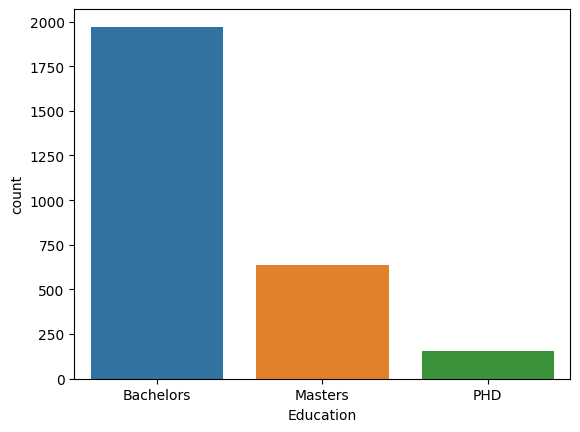

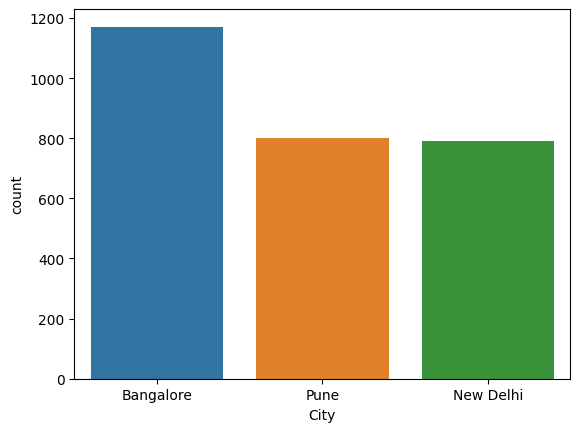

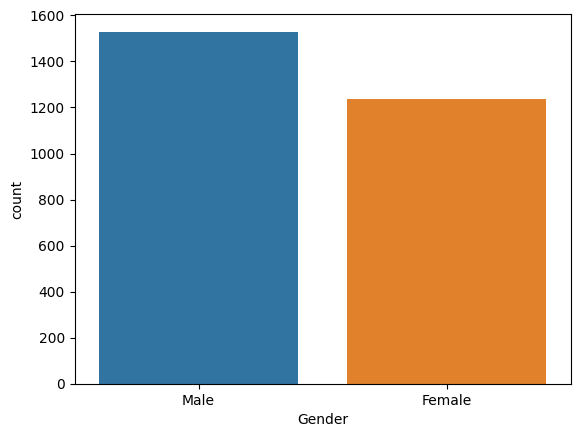

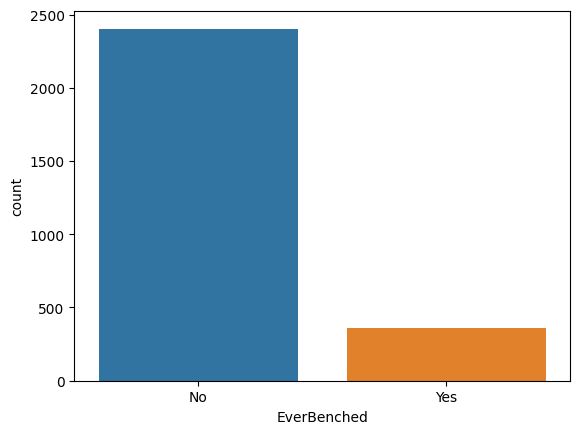

In [43]:
for col in categorical_data.columns:
  sns.countplot(x = col, data = data, hue = col)
  plt.show()

In [44]:
for col in categorical_data.columns:
  print(f"Value count of {col}")
  print(data[col].value_counts())
  print("*"*15)

Value count of Education
Education
Bachelors    1971
Masters       637
PHD           156
Name: count, dtype: int64
***************
Value count of City
City
Bangalore    1171
Pune          801
New Delhi     792
Name: count, dtype: int64
***************
Value count of Gender
Gender
Male      1529
Female    1235
Name: count, dtype: int64
***************
Value count of EverBenched
EverBenched
No     2403
Yes     361
Name: count, dtype: int64
***************


In [45]:
data['LeaveOrNot'].value_counts()

,count
LeaveOrNot,
0,1676
1,1088


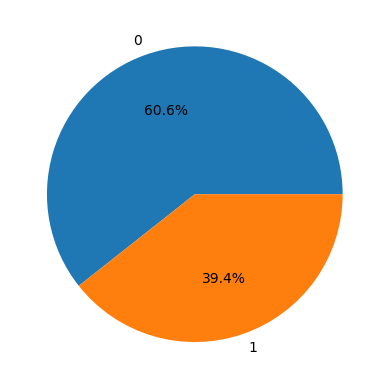

In [46]:
churn_counts = data['LeaveOrNot'].value_counts(normalize=True)

plt.pie(churn_counts.values, labels = churn_counts.index, autopct = '%1.1f%%')
plt.show()

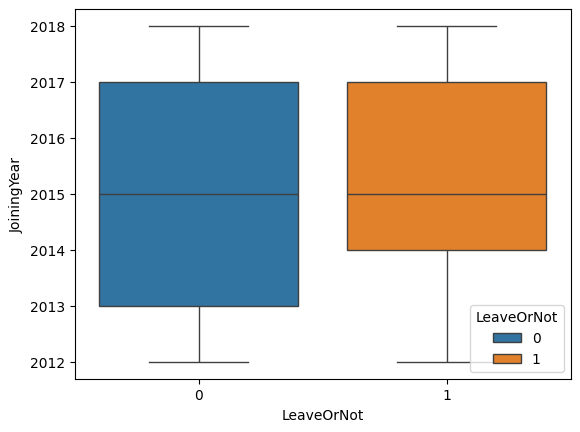

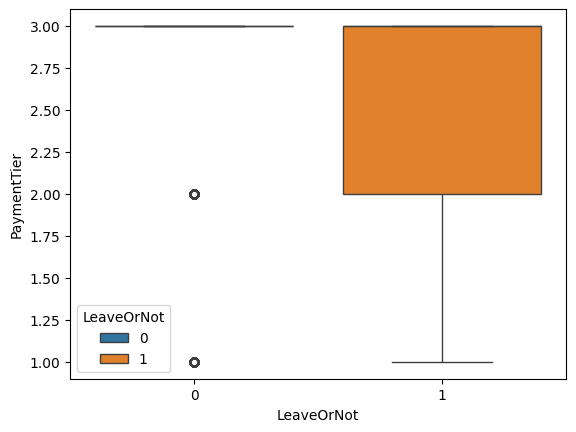

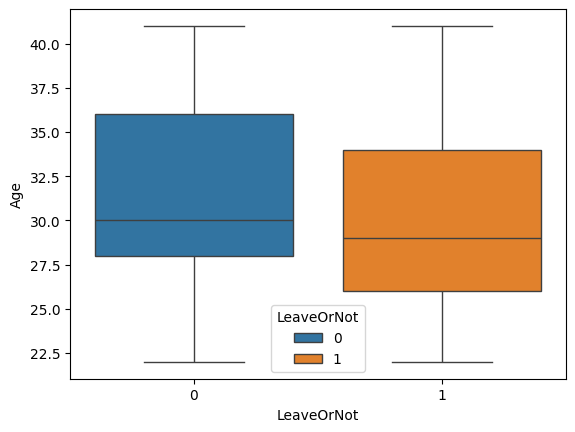

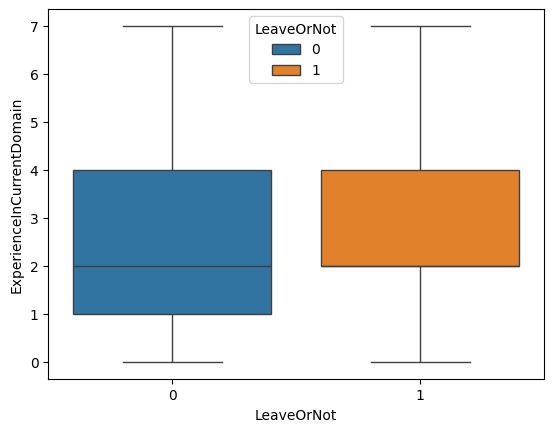

In [47]:
for col in numerical_data.columns:
  sns.boxplot(x = 'LeaveOrNot', y = col, data = data, hue = 'LeaveOrNot')
  plt.show()

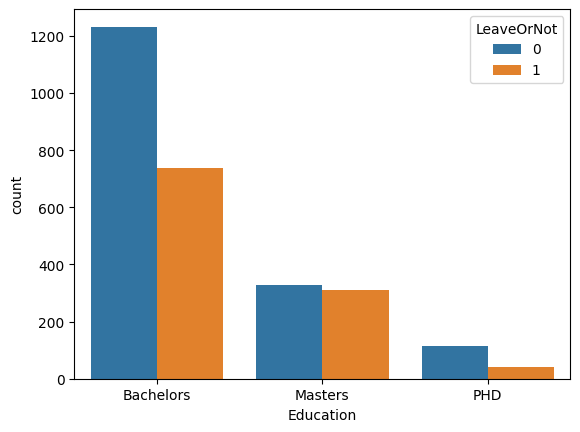

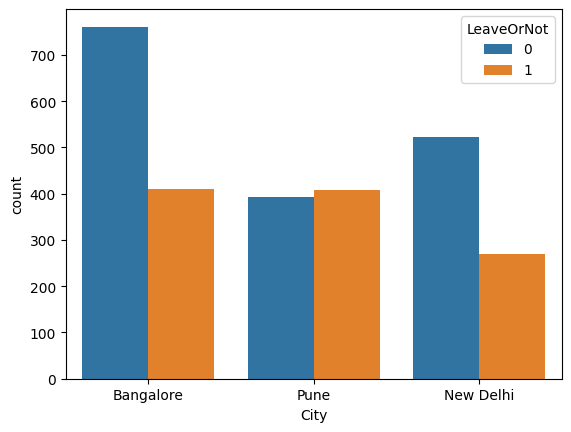

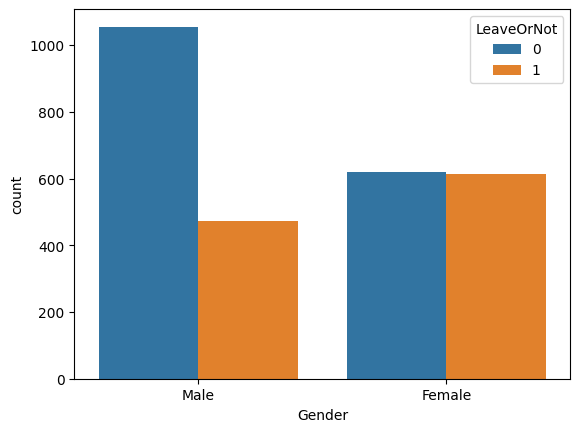

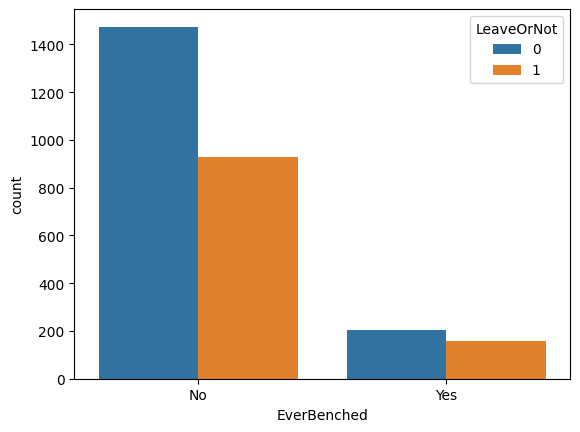

In [48]:
for col in categorical_data.columns:
  sns.countplot(x = col, data = data, hue = 'LeaveOrNot')
  plt.show()

In [49]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [50]:
data = pd.get_dummies(data, columns = ['Education', 'City', 'Gender', 'EverBenched'], dtype = int)
data.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,1,0,0,1,0,0,0,1,1,0
1,2013,1,28,3,1,1,0,0,0,0,1,1,0,1,0
2,2014,3,38,2,0,1,0,0,0,1,0,1,0,1,0
3,2016,3,27,5,1,0,1,0,1,0,0,0,1,1,0
4,2017,3,24,2,1,0,1,0,0,0,1,0,1,0,1


In [51]:
num_columns = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']
X = data.drop(columns='LeaveOrNot')
y = data['LeaveOrNot']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [54]:
X_train.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
3329,1.023141,0.591100,0.208167,1.465683,1,0,0,1,0,0,0,1,1,0
3192,-0.571805,0.591100,0.599708,-1.646114,1,0,0,0,0,1,0,1,1,0
168,-0.040156,0.591100,-0.574915,0.220964,1,0,0,1,0,0,0,1,1,0
4070,-0.040156,-2.581039,-1.749539,-1.646114,1,0,0,0,0,1,1,0,1,0
3036,1.023141,-0.994970,0.991249,1.465683,0,1,0,0,1,0,0,1,1,0


In [55]:
X_test.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
1620,-0.040156,0.5911,-0.966457,0.843324,0,1,0,0,0,1,1,0,1,0
4271,-1.103454,0.5911,-0.379145,0.843324,1,0,0,1,0,0,0,1,1,0
3927,1.023141,0.5911,1.970102,0.220964,0,1,0,0,1,0,0,1,1,0
249,-0.040156,0.5911,-0.966457,0.843324,0,1,0,0,1,0,1,0,1,0
3091,-0.040156,0.5911,1.774331,-0.401395,1,0,0,1,0,0,1,0,1,0


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
pred_train = lg_model.predict(X_train)
pred_test = lg_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))


Training Accuracy Score:  0.681592039800995
Testing Accuracy Score:  0.6817359855334539


Precision:  0.64
Recall:  0.44036697247706424
F1-Score:  0.5217391304347826
Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       335
           1       0.64      0.44      0.52       218

    accuracy                           0.68       553
   macro avg       0.67      0.64      0.64       553
weighted avg       0.67      0.68      0.67       553

Confusion Matrix
[[281  54]
 [122  96]]


In [61]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_train = dt_model.predict(X_train)
pred_test = dt_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))


Training Accuracy Score:  0.9271822704658526
Testing Accuracy Score:  0.6835443037974683


Precision:  0.6048780487804878
Recall:  0.5688073394495413
F1-Score:  0.5862884160756501
Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       335
           1       0.60      0.57      0.59       218

    accuracy                           0.68       553
   macro avg       0.67      0.66      0.67       553
weighted avg       0.68      0.68      0.68       553

Confusion Matrix
[[254  81]
 [ 94 124]]


In [62]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

Training Accuracy Score:  0.9271822704658526
Testing Accuracy Score:  0.7432188065099458


Precision:  0.6979166666666666
Recall:  0.6146788990825688
F1-Score:  0.6536585365853659
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       335
           1       0.70      0.61      0.65       218

    accuracy                           0.74       553
   macro avg       0.73      0.72      0.72       553
weighted avg       0.74      0.74      0.74       553

Confusion Matrix
[[277  58]
 [ 84 134]]


In [63]:
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)
pred_train = gb_model.predict(X_train)
pred_test = gb_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))


Training Accuracy Score:  0.8199909543193126
Testing Accuracy Score:  0.8209764918625678


Precision:  0.8789808917197452
Recall:  0.6330275229357798
F1-Score:  0.736
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       335
           1       0.88      0.63      0.74       218

    accuracy                           0.82       553
   macro avg       0.84      0.79      0.80       553
weighted avg       0.83      0.82      0.81       553

Confusion Matrix
[[316  19]
 [ 80 138]]


In [64]:
feature_importances = gb_model.feature_importances_

df = pd.DataFrame({'features' : X_train.columns, 'importance' : feature_importances})
importance_df = df.sort_values(by = 'importance', ascending=True)

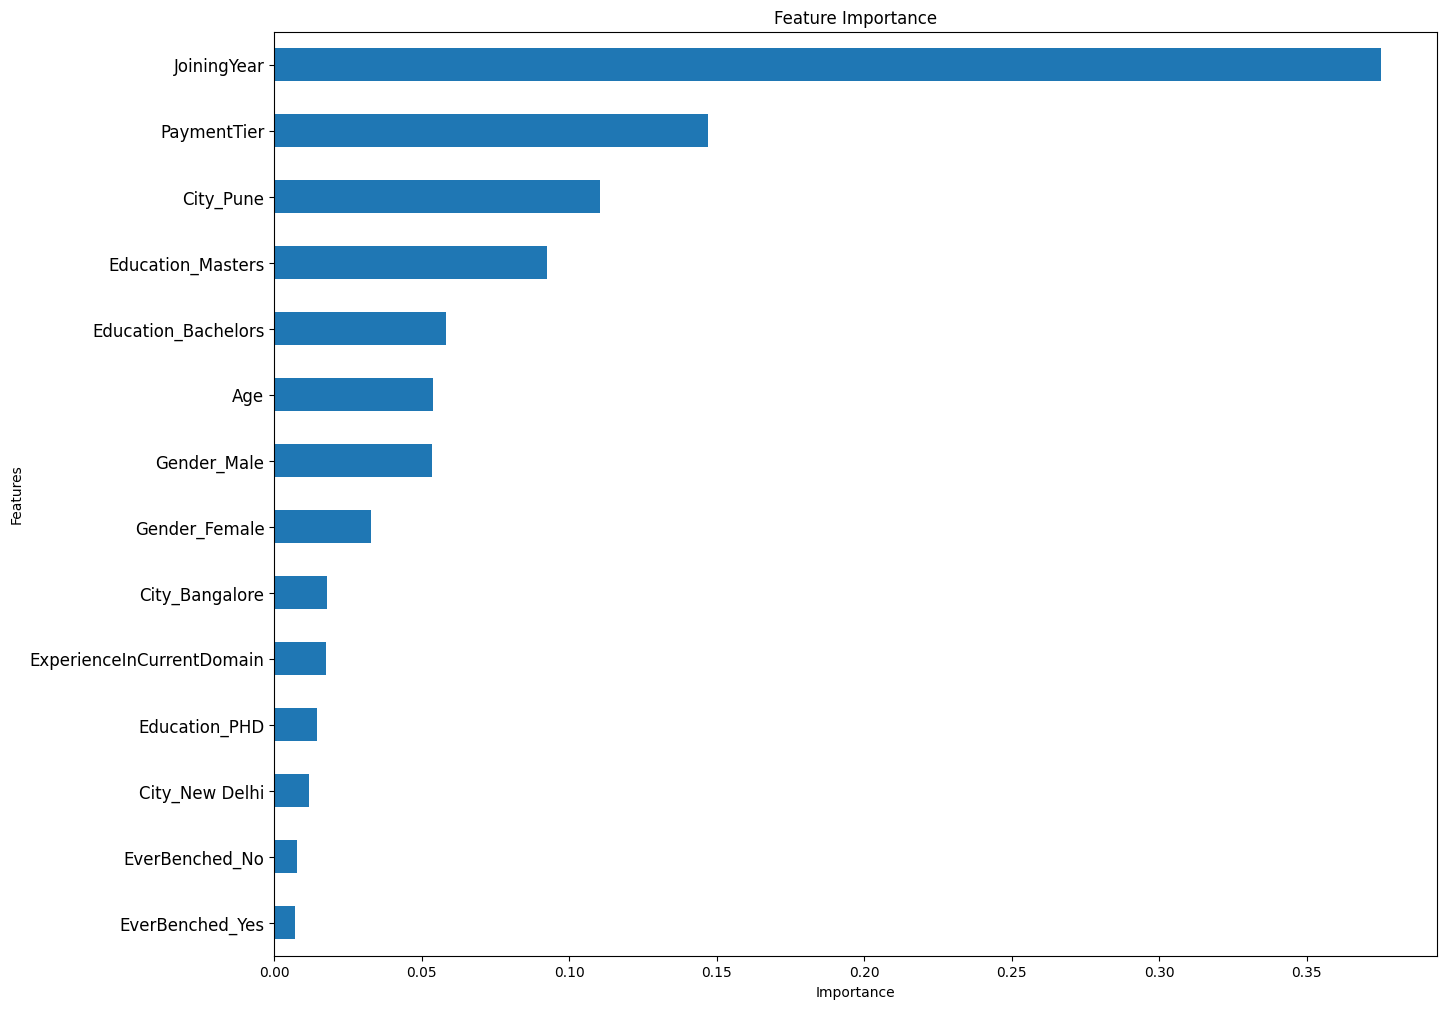

In [65]:
fig, ax = plt.subplots(figsize=(15, 12))
importance_df.plot(kind='barh', x='features', y='importance', legend=False, ax=ax)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.tick_params(axis='y', labelsize=12)
plt.show()

In [66]:
pd.set_option("display.max_rows", None)
importance_df = df.sort_values(by = 'importance', ascending=False)
importance_df

,features,importance
0,JoiningYear,0.375299
1,PaymentTier,0.147232
9,City_Pune,0.110527
5,Education_Masters,0.092431
4,Education_Bachelors,0.058088
2,Age,0.053755
11,Gender_Male,0.053376
10,Gender_Female,0.032818
7,City_Bangalore,0.017845
3,ExperienceInCurrentDomain,0.017475
